# Detection of Tomato Leaf Disease by Transfer learning VGG16
Importing libraries and essentials for the model


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.8.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: google-pasta, termcolor, setuptools, opt-einsum, gast, grpcio, protobuf, keras-preprocessing, libclang, tf-estimator-nightly, h5py, astunparse, keras, wrapt, typing-extensions, tensorboard, flatbuffers, absl-py, numpy, six, tensorflow-io-gcs-filesystem
Required-by: kapre


In [ ]:
!wget https://www.dropbox.com/s/sw8uob9gnyfwybz/tomatotestandval.zip?dl=0
!unzip /content/tomatotestandval.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: tomatotestandval/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/ac4dd753-ac30-4a2b-ae63-7cf0ec85dddb___YLCV_GCREC 2578.JPG  
  inflating: tomatotestandval/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/ac593008-ed4e-496f-8785-6712cb39a858___YLCV_GCREC 2454.JPG  
  inflating: tomatotestandval/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/ac5c779e-f33c-4389-8ac7-1ffb4a65a5c2___YLCV_GCREC 2479.JPG  
  inflating: tomatotestandval/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/ac68da83-a9a2-4d22-b6ab-977e7e0f1fdd___UF.GRC_YLCV_Lab 03156.JPG  
  inflating: tomatotestandval/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/ac7704c1-81cd-4188-b193-efb3cd93a4f4___UF.GRC_YLCV_Lab 02841.JPG  
  inflating: tomatotestandval/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/ac9e49c7-e50f-4f54-a81c-284b39e937be___UF.GRC_YLCV_Lab 01978.JPG  
  inflating: tomatotestandval/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/aca447c5-2284-4b01-854f-1147f24e085a___U

In [ ]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


Data Augmentation

Increasing the data by horizontal flip, shear range and rotation range to get the image classification better accuracy. Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data.


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,shear_range=.2,rotation_range=.2)
test_datagen=ImageDataGenerator(rescale=1./255)


About Dataset

* The dataset consists of training data, validation data, and testing data.

* The training data consists of 18345 images with 10 classes and  3,875 test images with 10.
* The classes are Tomato_Bacterialspot, TomatoEarly_blight, Tomatohealthy, TomatoLate_blight, Tomato_LeafMold, TomatoSeptoria_leaf_spot, Tomato_Spider_mites Two-spotted_spidermite, TomatoTarget_Spot, Tomato_Tomato_mosaicvirus, TomatoTomato_Yellow_Leaf_Curl_Virus.



In [ ]:
training_set=train_datagen.flow_from_directory("/content/tomatotestandval/train",
                                               target_size=(224,224),class_mode="categorical",batch_size=50,shuffle=True)
test_set=test_datagen.flow_from_directory("/content/tomatotestandval/val",
                                          target_size=(224,224),batch_size=50,class_mode="categorical",shuffle=True)

Found 14529 images belonging to 10 classes.
Found 3631 images belonging to 10 classes.


VGG16

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.

In [ ]:
vgg16=VGG16(include_top=False,weights="imagenet",input_shape=[224,224,3])

58900480/58889256 [==============================] - 0s 0us/step


We will not train the layers because the layers of VGG16 layers are already trained with imagenet dataset.

In [ ]:
for layer in vgg16.layers:
  layer.trainable=False

In [ ]:
folder=glob("/content/tomatotestandval/train/*")
folder

['/content/tomatotestandval/train/Tomato___Bacterial_spot',
 '/content/tomatotestandval/train/Tomato___Septoria_leaf_spot',
 '/content/tomatotestandval/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/tomatotestandval/train/Tomato___Tomato_mosaic_virus',
 '/content/tomatotestandval/train/Tomato___healthy',
 '/content/tomatotestandval/train/Tomato___Leaf_Mold',
 '/content/tomatotestandval/train/Tomato___Target_Spot',
 '/content/tomatotestandval/train/Tomato___Late_blight',
 '/content/tomatotestandval/train/Tomato___Early_blight',
 '/content/tomatotestandval/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus']



Adding a flatten layer along with a Dense layer whose neuron will be equal to the number of classes with and activation funtion softmax

Then we will concat the model and name vgg16_model


In [ ]:


x=Flatten()(vgg16.output)
pred_vgg16=Dense(units=len(folder),activation="softmax")(x)
vgg16_model=Model(inputs=vgg16.input,outputs=pred_vgg16)



We have taken the optimizer Adam and the loss will be categorical crossentropy and our aim will be to find the accuracy

In [ ]:
vgg16_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


Final Architecture

In [ ]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Train the model with an epoch of 20 and the validation data will be the test data

In [ ]:
transfer_vgg16=vgg16_model.fit_generator(training_set,validation_data=test_set,epochs=1,
                                         validation_steps=len(test_set),steps_per_epoch=len(training_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


291/291 [==============================] - 9290s 32s/step - loss: 0.6097 - accuracy: 0.8087 - val_loss: 0.4600 - val_accuracy: 0.8389




After the training I have noticed that the model is not overfit and the loss and accuracy is somewhat equal to validation loss and validation accuracy.

Which means the model will perform good


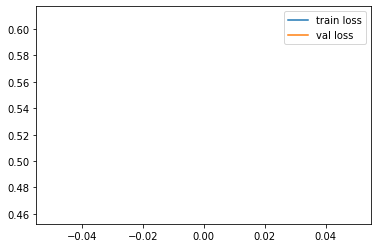

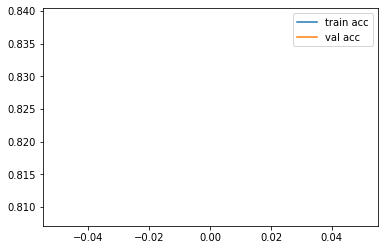

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(transfer_vgg16.history['loss'], label='train loss')
plt.plot(transfer_vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(transfer_vgg16.history['accuracy'], label='train acc')
plt.plot(transfer_vgg16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Prediction

In [ ]:
y_pred_vgg16=vgg16_model.predict(test_set)

The predicted output is a probability due to the activation funtion Softmax, it returns probability of the classes We will now change the probability to discrete values

In [ ]:
import numpy as np
y_pred_vgg16=np.argmax(y_pred_vgg16,axis=1)

Saving the model

In [ ]:
vgg16_model.save("Tomato_vgg16.h5")
from tensorflow.keras.models import load_model
modelvgg16=load_model("Tomato_vgg16.h5")

Testing the Model with validation dataset

Saving 0ae36892-5cb1-476e-8a51-b7fd8183a535___Crnl_L.Mold 6728.JPG to 0ae36892-5cb1-476e-8a51-b7fd8183a535___Crnl_L.Mold 6728.JPG
Tomato___Leaf_Mold


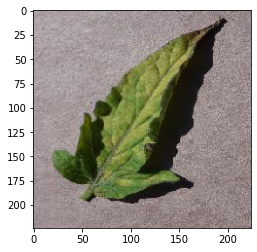

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  preds = modelvgg16.predict(x)
  preds=np.argmax(preds, axis=1)
  if preds==0:
        preds="Tomato___Bacterial_spot"
  elif preds==1:
        preds="Tomato___Early_blight"
  elif preds==2:
        preds="Tomato___healthy"
  elif preds==3:
        preds="Tomato___Late_blight"
  elif preds==4:
        preds="Tomato___Leaf_Mold"
  elif preds==5:
        preds="Tomato___Septoria_leaf_spot"
  elif preds==6:
        preds="Tomato___Spider_mites Two-spotted_spider_mite"
  elif preds==7:
        preds="Tomato___Target_Spot"
  elif preds==8:
        preds="Tomato___Tomato_mosaic_virus"
  else:
        preds="Tomato___Tomato_Yellow_Leaf_Curl_Virus"
  print(preds)
  plt.imshow(img)